In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

In [115]:
data = pd.read_csv('../data/insurance.csv')

In [116]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
print(data.shape)

(1338, 7)


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age Info

In [120]:
def plot_column_data(data, column_name, target_name):
    _, axes_0 = plt.subplots(nrows=1, ncols=3, figsize=(8*3, 5))

    axes_0[0].scatter(
        data[column_name], 
        data[target_name],
        color='red',
        label=column_name
    )
    axes_0[0].grid()

    axes_0[1].hist(x=data[column_name], bins=20)
    axes_0[1].grid()

    boxplot=sns.boxplot(
        data=data,
        x=column_name,
        orient='h',
        ax=axes_0[2]
    )
    boxplot.set_xlabel(column_name)
    boxplot.grid()

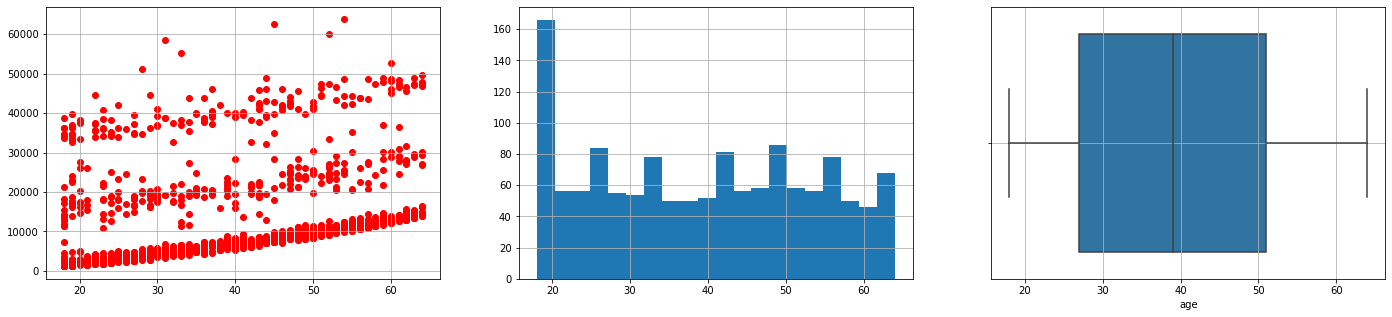

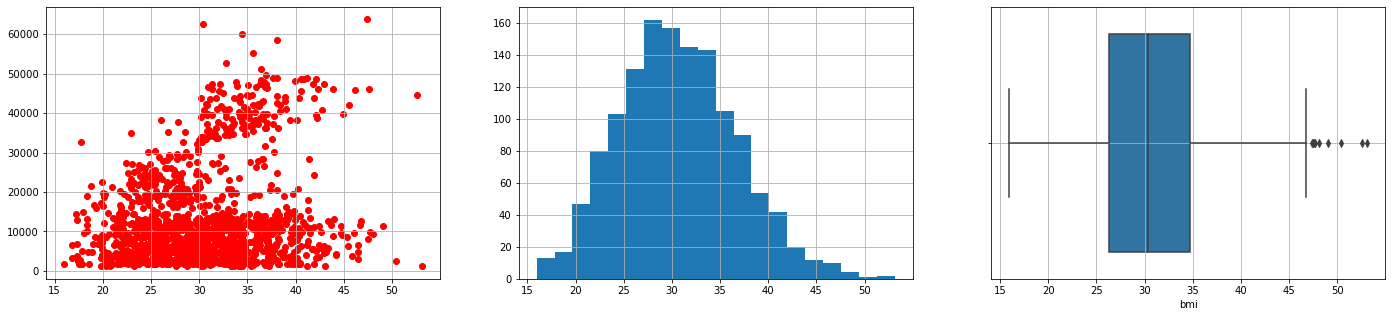

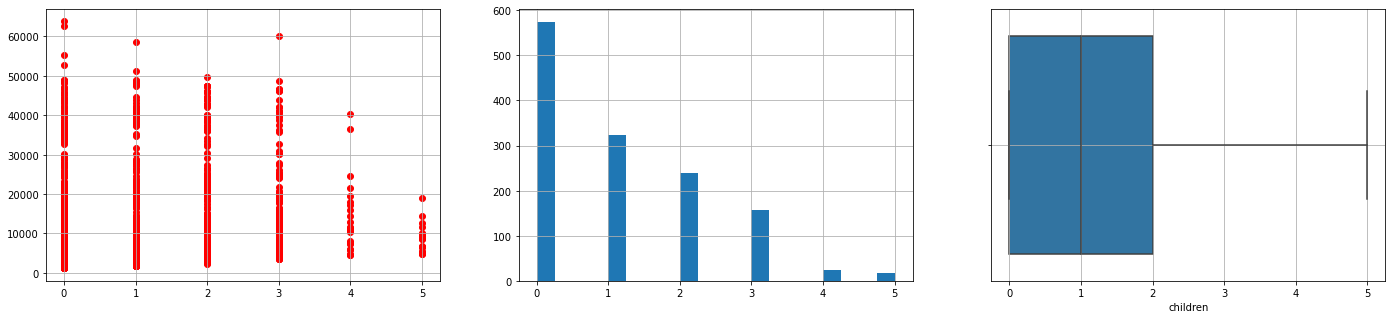

In [121]:
for i in ["age", "bmi", "children"]:
    plot_column_data(data, i, "charges")

In [122]:
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [123]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [125]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 9)
(1070,)
(268, 9)
(268,)


In [128]:
liner_model = linear_model.LinearRegression()
liner_model.fit(X_train, y_train)

LinearRegression()

In [129]:
liner_model.intercept_

-12390.804294570282

In [136]:
pred_train = liner_model.predict(X_train)
pred_test = liner_model.predict(X_test)

In [138]:
print(metrics.r2_score(y_train, pred_train))
print(metrics.mean_absolute_error(y_train, pred_train))
print(metrics.mean_absolute_percentage_error(y_train, pred_train))
print()
print(metrics.r2_score(y_test, pred_test))
print(metrics.mean_absolute_error(y_test, pred_test))
print(metrics.mean_absolute_percentage_error(y_test, pred_test))

0.7417255854683333
4208.234572492219
0.4220268508031631

0.7835929767120723
4181.194473753641
0.46888255979146604


In [165]:
train_error = y_train.values - pred_train
test_error = y_test.values - pred_test

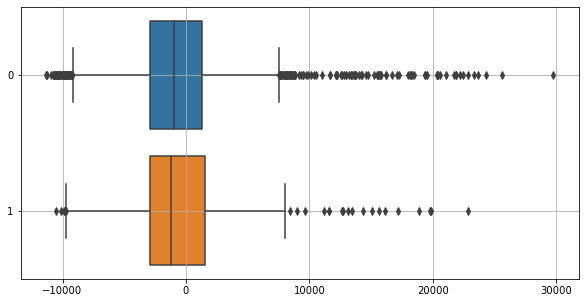

In [167]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
boxplot=sns.boxplot(
        data=[train_error, test_error],
        orient='h',
        ax=axes
        )
boxplot.grid()

In [168]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_train_scaled_poly.shape)

(1070, 54)


In [170]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [171]:
y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)

In [172]:
print(metrics.r2_score(y_train, y_train_predict))
print(metrics.mean_absolute_error(y_train, y_train_predict))
print(metrics.mean_absolute_percentage_error(y_train, y_train_predict))
print()
print(metrics.r2_score(y_test, y_test_predict))
print(metrics.mean_absolute_error(y_test, y_test_predict))
print(metrics.mean_absolute_percentage_error(y_test, y_test_predict))

0.8416960246812446
2914.438996457944
0.3015204695001434

0.8668212118541303
2753.344605033582
0.30963112583046565


In [173]:
print(lr_poly.coef_)

[-3.35078495e+16  1.78358281e+17  1.64035044e+16 -1.08179882e+16
 -2.41302853e+16 -7.37782096e+16 -3.14485544e+16 -6.91874439e+16
 -6.22919615e+16  8.51200000e+03  8.64000000e+02  1.06400000e+03
 -1.89600000e+03  2.44000000e+02  3.35078495e+16  3.35078495e+16
  3.35078495e+16  3.35078495e+16 -1.81407074e+17  6.67000000e+02
 -1.27600000e+03  1.96000000e+02  3.04879294e+15  3.04879294e+15
  3.04879294e+15  3.04879294e+15 -9.67325000e+03  1.68000000e+03
  5.49650000e+04 -1.64035044e+16 -1.64035044e+16 -1.64035044e+16
 -1.64035044e+16 -1.97600000e+03 -2.23400000e+03  1.08179882e+16
  1.08179882e+16  1.08179882e+16  1.08179882e+16  2.08355712e+16
  3.29471411e+15  3.29471411e+15  3.29471411e+15  3.29471411e+15
 -2.80858668e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.04155220e+16  0.00000000e+00  0.00000000e+00 -3.26766325e+16
  0.00000000e+00 -3.95721150e+16]


In [174]:
lasso_lr_poly = linear_model.Lasso()
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)


print(lasso_lr_poly.coef_)

[ 3254.29444013  -497.77667434  5082.44296811  4579.96903719
 11174.5885881     92.27997327  -474.0824118    585.76537158
  -243.94757338  8291.3159849    776.44311147   834.79828593
 -1211.25190072   133.7834509  -1044.725423      -0.
  1169.28596708  1614.02590931    -0.           511.03215486
 -1132.38078219   266.01794461 -1221.18415878     0.
   239.00186822  -577.34015094 -8185.15426742  1294.30664583
 54733.92609325  3582.81956575  2403.95450092  -968.57471909
    -0.         -1670.63577613 -2056.02514315  1943.04187366
  1954.4503939      0.         -1061.93641958 -8575.11156654
    -0.          -592.75085202  -851.52193562  1359.94923273
   723.55006857     0.             0.             0.
    -0.             0.             0.             0.
     0.            -0.        ]


/home/ivan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292406126.122919, tolerance: 15443697.546846818
  model = cd_fast.enet_coordinate_descent(


In [176]:
print(metrics.r2_score(y_test, y_test_predict))
print(metrics.mean_absolute_error(y_test, y_test_predict))
print(metrics.mean_absolute_percentage_error(y_test, y_test_predict))

0.8668339461311345
2717.8195375704317
0.30033382901569544


In [177]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict = ridge_lr_poly.predict(X_test_scaled_poly)

In [178]:
print(metrics.r2_score(y_test, y_test_predict))
print(metrics.mean_absolute_error(y_test, y_test_predict))
print(metrics.mean_absolute_percentage_error(y_test, y_test_predict))

0.863337661782377
2860.5545396470216
0.3137974995230937
